In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
num_clients = 40
K = 4
D = 2500
M = 1000

In [3]:
class Client_info:
    def __init__(self, cid, D, M):
        self.cid = cid
        self.x, self.y = self.generate_distance()
        self.D = D
        self.M = M
        self.delta = 5
        self.U = np.random.uniform(1.0, 3.0) * 10000.0
        self.f = np.random.uniform(1.0, 2.0)
        self.B = np.random.uniform(1.0, 10.0)
        self.p = np.random.uniform(20.0, 40.0)
        self.N = -104
        self.tcomp = self.computation_time()

    def generate_distance(self):
        x = np.random.uniform(1.0, 500.0)
        y = np.random.uniform(1.0, 500.0)
        return x, y

    def g(self, cluster_head):
        head_x, head_y = cluster_head
        d = np.sqrt((head_x - self.x) ** 2 + (head_y - self.y) ** 2)
        return -128.1 - 37.6 * np.log10(d)

    def computation_time(self):
        return (self.D * self.delta * self.U) / self.f

    def communication_time(self, cluster_head):
        self.r = self.B * np.log2(1 + self.g(cluster_head) * self.p / self.N)
        return self.M / self.r

    def total_time(self, cluster_head):
        self.tcomm = self.communication_time(cluster_head)
        return self.tcomp + self.tcomm

    def Info(self):
      print(
            f"ID: {self.cid}\n",
            f"Location x = {self.x:.2f}, y = {self.y:.2f}\n",
            f"Computing capability: {self.f:.2f}\n",
            f"CPU cycles: {self.U:.2f}\n",
            f"Transmit bandwidth: {self.B:.2f}\n",
            f"Transmit power: {self.p:.2f}\n",
        )

clients = [Client_info(id, D, M) for id in range(1, num_clients + 1)]

In [4]:
for client in clients:
  client.Info()

ID: 1
 Location x = 260.97, y = 147.10
 Computing capability: 1.39
 CPU cycles: 22149.22
 Transmit bandwidth: 3.74
 Transmit power: 30.51

ID: 2
 Location x = 16.13, y = 376.16
 Computing capability: 1.21
 CPU cycles: 25414.12
 Transmit bandwidth: 9.91
 Transmit power: 33.99

ID: 3
 Location x = 320.81, y = 272.05
 Computing capability: 1.96
 CPU cycles: 25433.77
 Transmit bandwidth: 3.51
 Transmit power: 20.44

ID: 4
 Location x = 485.48, y = 41.03
 Computing capability: 1.35
 CPU cycles: 20976.73
 Transmit bandwidth: 1.82
 Transmit power: 38.06

ID: 5
 Location x = 223.35, y = 15.86
 Computing capability: 1.55
 CPU cycles: 16643.17
 Transmit bandwidth: 3.77
 Transmit power: 23.39

ID: 6
 Location x = 56.70, y = 37.03
 Computing capability: 1.52
 CPU cycles: 17502.31
 Transmit bandwidth: 9.90
 Transmit power: 29.44

ID: 7
 Location x = 253.84, y = 91.77
 Computing capability: 1.29
 CPU cycles: 26775.18
 Transmit bandwidth: 3.42
 Transmit power: 20.54

ID: 8
 Location x = 337.23, y = 6

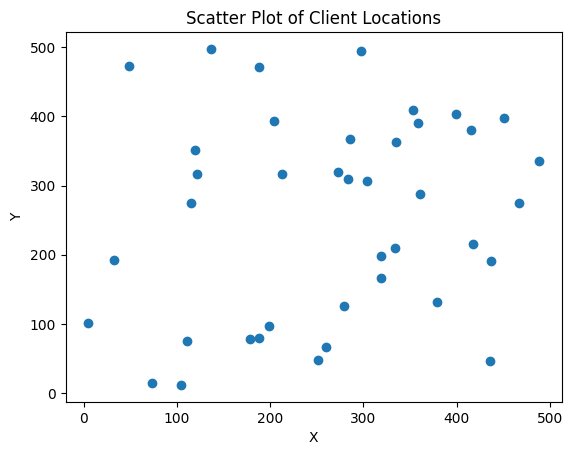

In [5]:
clients = [Client_info(id, 1000, 1000) for id in range(1, num_clients + 1)]

Location = [[client.x, client.y] for client in clients]
Location_array = np.array(Location)

plt.scatter(Location_array[:, 0], Location_array[:, 1])

plt.title('Scatter Plot of Client Locations')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
def init_centers(X, k):
    X = np.array(X)
    return X[np.random.choice(len(X), k, replace=False)]

def times_calculation(X, centers):
    X_coords = np.array([(client.x, client.y) for client in X])
    centers_coords = np.array([(center.x, center.y) for center in centers])

    times = cdist(X_coords, centers_coords)

    return times

def update_x(phi):
  pass

def update_center(clients, t, x, k):
    m = clients[np.sum(x * t, axis = 0) / np.sum(x)]
    return m

def variance(x, t, m):
    return np.sum(x * np.sum((t - m)**2, axis=0))


def update_weight(Beta, w, p, V):
    return Beta * w + (1 - Beta) * w ** (1 / 1 - p) / np.sum(w ** (1 / 1 - p))

def calculate_omega():
  pass

def select_cluster_heads():
  pass

In [7]:
def clustering_algorithm(clients_info, K, p, Beta, epsilon, Rmax):
    # Bước 1: khởi tạo các tham số
    I = len(clients_info)
    m = init_centers(clients_info, K)
    R = 0
    phi = np.ones(K) / M

    # Bước 2: tính toán các giá trị ti
    times = times_calculation(clients_info, m)

    # Bước 3: Khởi tạo các giá trị cho vòng lặp
    x = []
    weights = []
    omega = []
    # Bước 4: Cài đặt thuật toán CA
    while True:
        R += 1
        new_x = update_x(K, )
        x.append(new_x)

        new_center = update_center(clients_info, times, x[-1], K)
        weights.append(update_weight())
        omega.append(calculate_omega())

        if omega[-1] - omega[-2] <= epsilon or R > Rmax:
            break

    # Chọn cluster_heads
    cluster_heads = select_cluster_heads(x)

    return x, cluster_heads